One example of a nonsequential neural network is a Wide & Deep neural network

It connects all or part of the inputs directly to the output layer

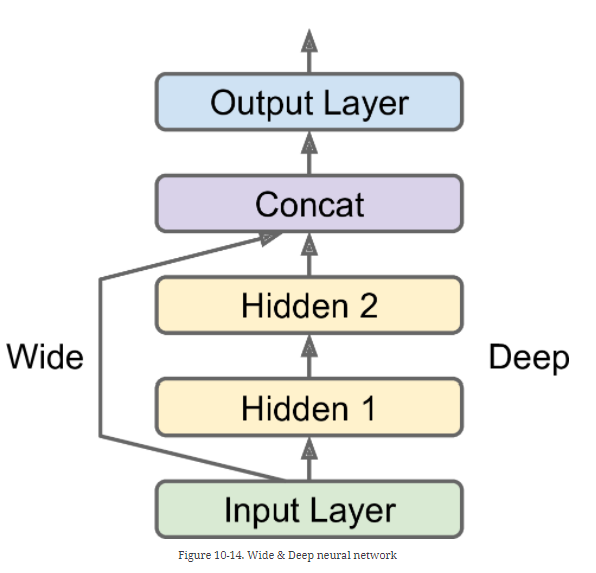

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)

In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

Let’s build such a neural network to tackle the California housing problem:

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

"""
removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
"""
First, we need to create an Input object. 
This is a specification of the kind of input the model will get, including its shape and dtype. 
A model may actually have multiple inputs, as we will see shortly.
"""
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])